In [1]:
import os

import numpy as np

os.getcwd()  # pour afficher le chemin de travail actuel
os.chdir('/home/batman/Documents/Picsellia/picsellia_repos/picsellia-training-engine/labelfix-vs-vlms/labelfix')

In [8]:
import tensorflow as tf

In [14]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')

In [15]:
gpu_devices

[]

In [18]:
from labelfix.src.labelfix import check_dataset
from labelfix.src.utils.visualize import visualize_image


Dataset statistics:
Shape of X: (60000, 28, 28, 1), shape of y: (60000,)
Distribution of labels: y.max_count / y.min_count: 1.0 

Assuming image input since data has dimensionality 4.




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 48)        240       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 48)        9264      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 48)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 48)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None,

2024-03-14 10:54:09.904025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-14 10:54:09.904142: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3050 Ti Laptop GPU major: 8 minor: 6 memoryClockRate(GHz): 1.035
pciBusID: 0000:01:00.0
2024-03-14 10:54:09.904400: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory
2024-03-14 10:54:09.904440: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcublas.so.10.0'; dlerror: libcublas.so.10.0: cannot open shared object file: No such file or directory
2024-03-14 10:54:09.904466: W tensorflow/stream_executor/platform/default/dso_loader.cc:5

Figure saved to /tmp/found_fashion_mnist/0.png


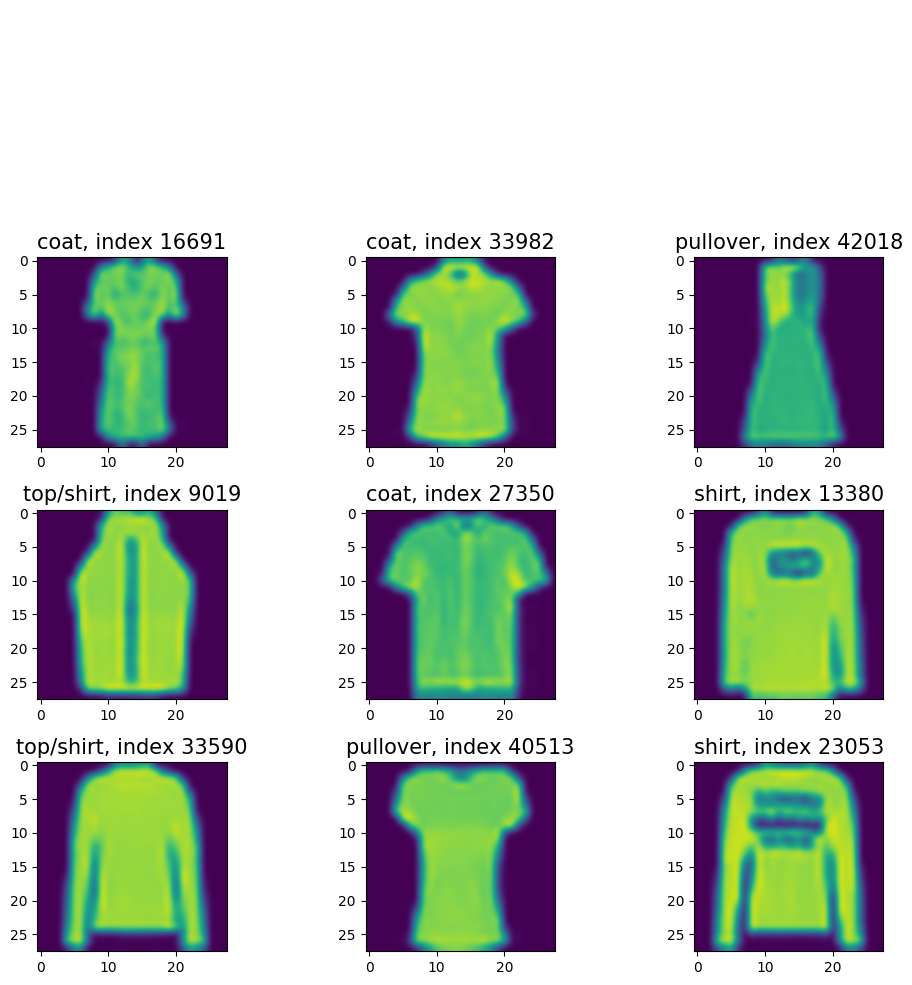

Figure saved to /tmp/found_fashion_mnist/1.png


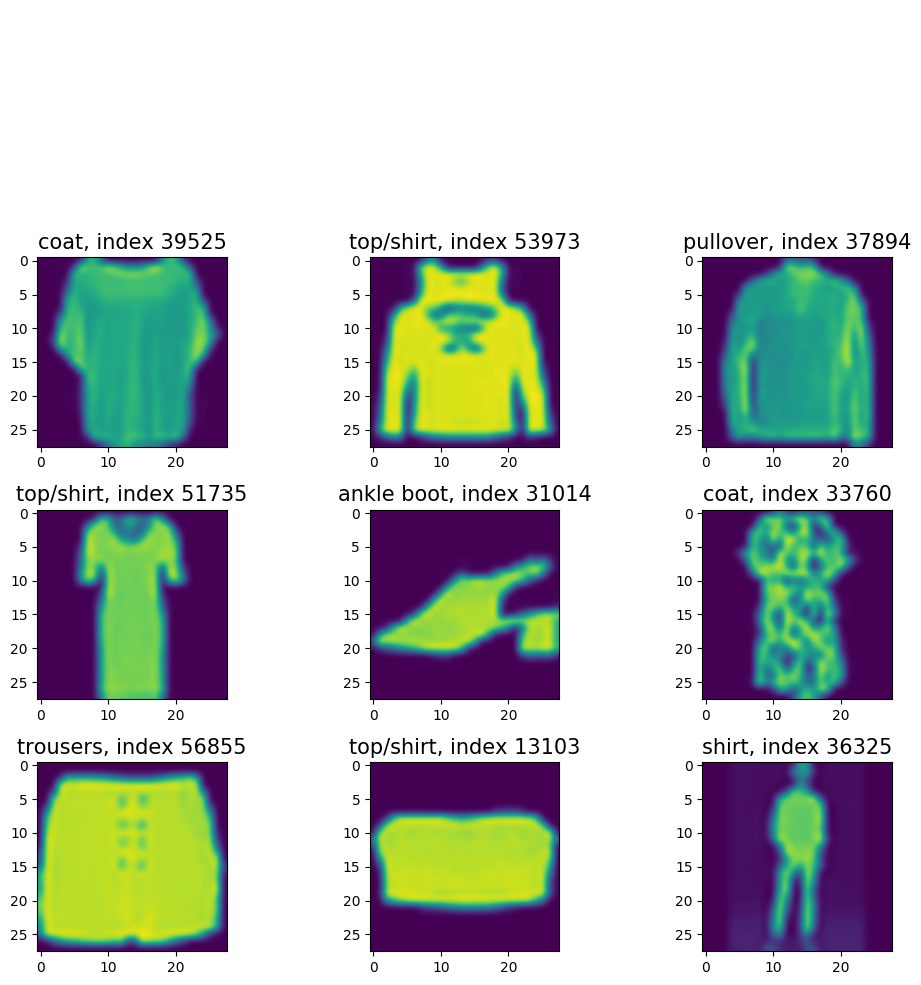

Figure saved to /tmp/found_fashion_mnist/2.png


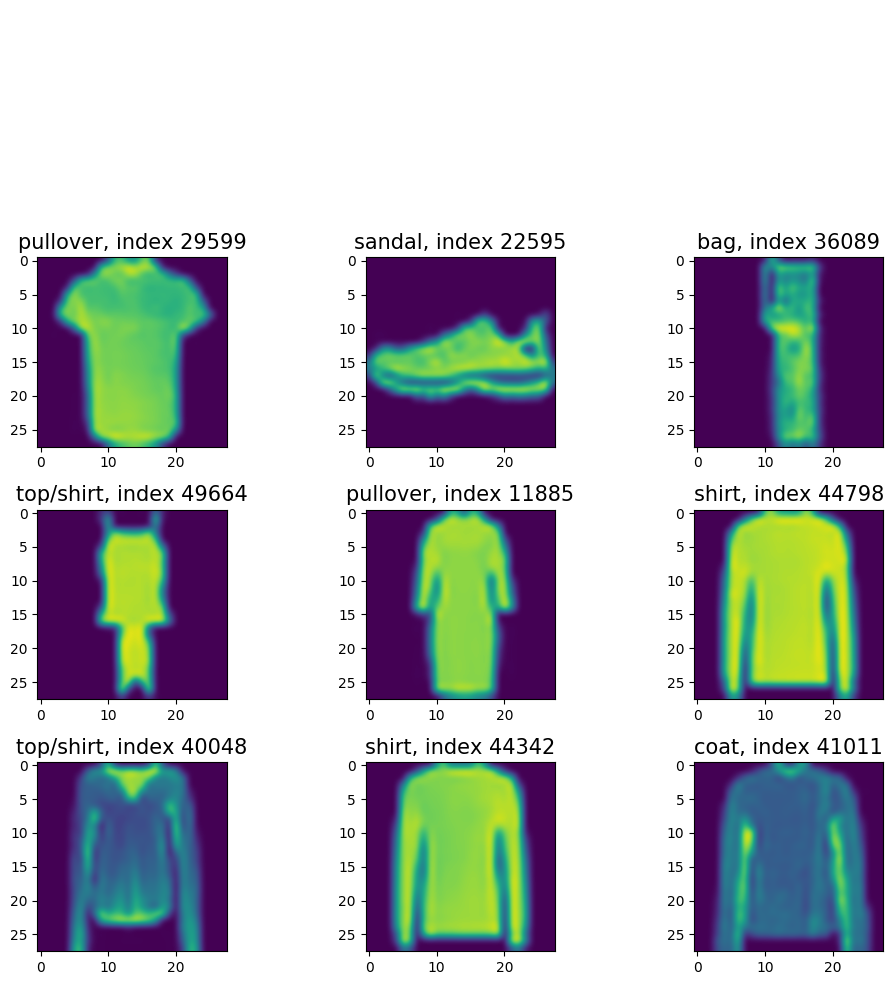

Figure saved to /tmp/found_fashion_mnist/3.png


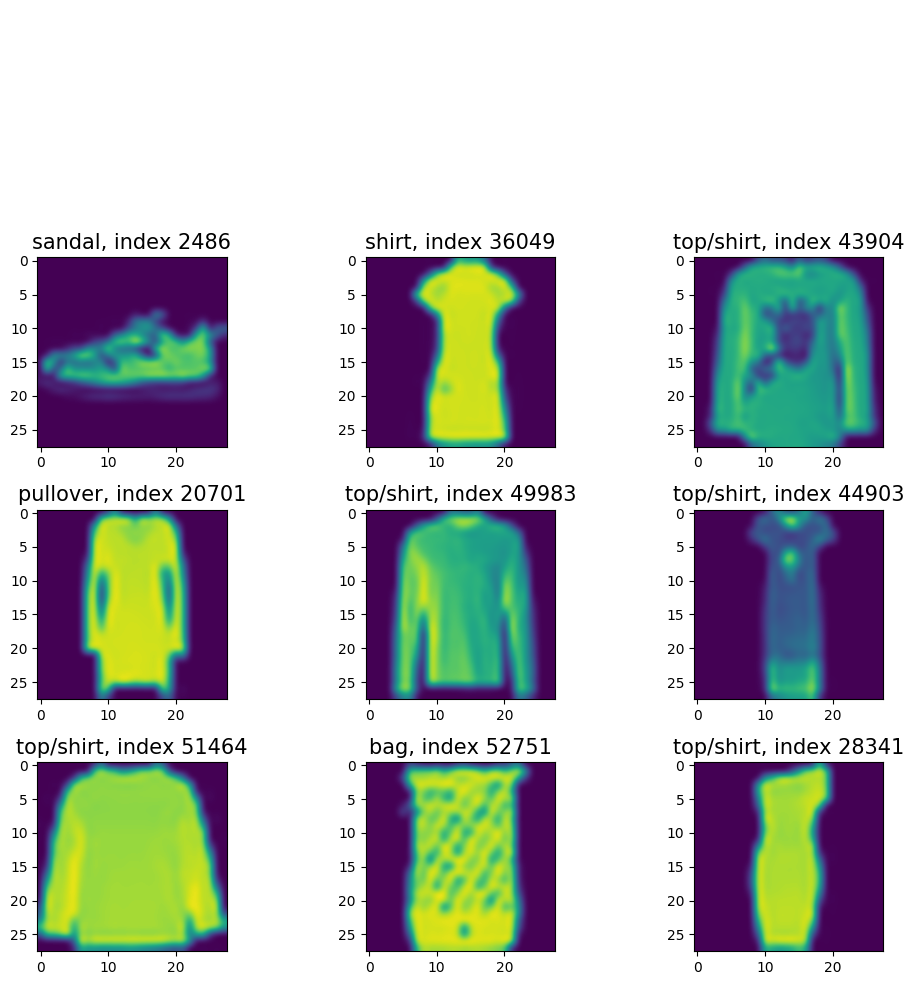

In [19]:
# First, construct required dictionary using the fashion mnist training data
(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
dataset = {'data': x_train, 'target': y_train}

# check the data set
res = check_dataset(X=np.expand_dims(x_train, axis=-1), y=y_train)

# plot four sets of images with the most likely mislabeled pairs (x, y) and save to disk
for i in range(4):
    visualize_image(image_data=dataset["data"],
                    image_labels=dataset["target"],
                    label_names=["top/shirt", "trousers", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"],
                    indices=res["indices"],
                    batch_to_plot=i,
                    save_to_path="/tmp/found_fashion_mnist/")